# Introduction to Quantum Computing

This notebook gives a concise introduction to some of the fundamental principles of quantum computing.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. The Qubit

For those that have an understanding of how a classical computer works, you may be familiar with the 'bit'. The bit is the fundamental unit of information in classical computing, and takes on a value of either 0 or 1. Every operation performed on a classical computer can be thought of as a series of operations (or 'logic gates') performed using bits.

Similarly, quantum computing has the 'qubit'. The qubit can be physically realised as any 2-level quantum system. It is the fundamental unit of information in quantum computing, and when it is measured it will also take on a value of either 0 or 1, just like the bit. What is unique about the qubit, however, is that until it is measured it can be in a state that is a superposition of both 0 and 1.

This superposition can be thought of as the linear combination of its two orthonormal basis states: |0⟩ and |1⟩. These are called "kets" (from Bra-ket notation), where |0⟩ represents the vector [1 0] and |1⟩ is the vector [0 1]. These kets represent the two classical states of the bit. By combining the two states in different linear combinations, you can represent any possible state of the qubit. The qubit state is often thought of as being represented by a 'state vector':

<center>$|{\psi}⟩ = {\alpha}|0⟩ + {\beta}|1⟩$</center><br>

The coefficients ${\alpha}$ and ${\beta}$ are complex numbers. The probability of measuring the qubit in state |0⟩ or |1⟩ is given by the squared magnitude of the corresponding coefficient. 

Feel free to play around with the below snippet of code to see how changing the complex coefficients effects the probability of measuring the respective state. Simply change the values in the final line and run the code block. Note that the code will normalize the values for you, so that the total probability of measuring either state will always add to 1.

In [77]:
def update_state_vector(alpha, beta):
    # Define the state vector for a qubit
    state_vector = np.array([alpha, beta])
    print("State Vector: ", state_vector)
    #Enforce normalization 
    state_vector = state_vector / np.linalg.norm(state_vector)
    print("Normalized State Vector: ", state_vector)

    # Define the measurement operators for the |0⟩ and |1⟩ states
    measurement_0 = np.array([[1, 0], [0, 0]])
    measurement_1 = np.array([[0, 0], [0, 1]])

    # Calculate the probability of measuring the |0⟩ state
    prob_0 = np.dot(np.dot(state_vector, measurement_0), state_vector.conj()).real
    print("Probability of measuring the |0⟩ state: ", prob_0)

    # Calculate the probability of measuring the |1⟩ state
    prob_1 = np.dot(np.dot(state_vector, measurement_1), state_vector.conj()).real
    print("Probability of measuring the |1⟩ state: ", prob_1)

# Example usage
update_state_vector(1/np.sqrt(2), 1/np.sqrt(2))

State Vector:  [0.70710678 0.70710678]
Normalized State Vector:  [0.70710678 0.70710678]
Probability of measuring the |0⟩ state:  0.5000000000000001
Probability of measuring the |1⟩ state:  0.5000000000000001


### 1.1. Bloch Sphere

A useful tool for visualizing the state of a qubit is the Bloch sphere. A Bloch sphere is a mathematical representation of the state of a qubit. 

<center><div><img src=https://www.researchgate.net/publication/335028508/figure/fig1/AS:789466423762944@1565234871365/The-Bloch-sphere-provides-a-useful-means-of-visualizing-the-state-of-a-single-qubit-and.ppm width="400"/></div></center><br>

The |0⟩ state of the qubit is represented by the point on the positive z-axis, and the |1⟩ state of the qubit is represented by the point on the negative z-axis. Any other state of the qubit can be represented as a point on the surface of the sphere, with the angle between the point and the positive z-axis representing the probability of the qubit being in the |0⟩ state. The state of a qubit can also be represented by a vector pointing from the origin to a point on the sphere, with the direction of the vector representing the relative phase between the |0⟩ and |1⟩ states. The Bloch sphere is a powerful tool that helps in visualizing the state of a qubit, and understanding the effects of quantum operations on it.

The code below helps to illustrate how changing the values of the angles on the Bloch sphere changes the probability of measuring the different states of the qubit. As above, simply change the values in the final line and run the code block.

Probability of measuring the |0⟩ state:  0.4999999999999999
Probability of measuring the |1⟩ state:  0.4999999999999998
The state is normalized.


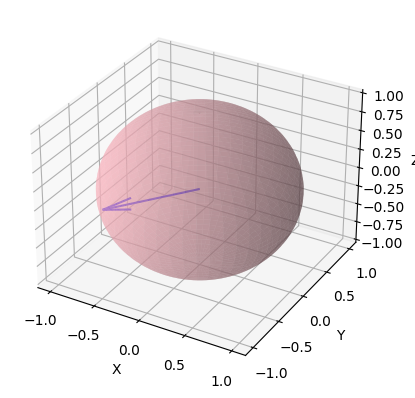

In [76]:
def update_bloch_sphere(theta, phi):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Generate data for a sphere
    u, v = np.linspace(0, 2 * np.pi, 100), np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the sphere
    ax.plot_surface(x, y, z, color='lightpink', alpha=0.5)

    # Define the state vector
    psi = np.array([np.cos(theta/2)*np.exp(1j*phi), np.sin(theta/2)*np.exp(-1j*phi)])

    # Find the probability of measuring the state
    prob_0 = abs(psi[0])**2
    print("Probability of measuring the |0⟩ state: ", prob_0)
    prob_1 = abs(psi[1])**2
    print("Probability of measuring the |1⟩ state: ", prob_1)

    # Enforce normalization
    if abs(prob_0 + prob_1 - 1) > 1e-5:
        print("Warning: state not normalized!")
    else:
        print("The state is normalized.")

    # Plot the point on the sphere
    ax.quiver(0, 0, 0, np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta), color='b')

    # Add labels and show plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Example usage
update_bloch_sphere(np.pi/2, 180)

## 2. Quantum Logic Gates

As previously mentioned, in classical computing we can think of every operation as being a series of logic gates that operate in sequence. Logic gates are the basic building blocks of digital electronics and computers. They are used to implement Boolean logic functions, which take one or more binary inputs (0 or 1) and produce a single binary output. There are several types of logic gates, each with a specific function. The most common types of logic gates can be seen in the figure below:

<center><div><img src=https://cs.lmu.edu/~ray/images/gates.gif width="400"/></div></center><br>

Quantum logic gates are the building blocks of quantum computing. Like classical logic gates, they take one or more inputs and produce a single output, but the inputs and outputs are qubits rather than classical bits. Quantum logic gates are unitary operations that manipulate the state of a qubit or a system of qubits. They are implemented using a variety of physical phenomena, such as the interaction between qubits and electromagnetic fields, or the manipulation of the energy levels of qubits using laser pulses.

There are several types of quantum logic gates, each with a specific function. The most common types of quantum logic gates include:

1. Pauli-X gate (NOT gate): it flips the state of a qubit, that is, it maps |0⟩ to |1⟩ and |1⟩ to |0⟩.
2. Pauli-Y gate: it rotates the state of a qubit by π/2 around the Y axis in the Bloch sphere.
3. Pauli-Z gate: it applies a phase factor of -1 to the state |1⟩ and leaves |0⟩ unchanged.
4. Hadamard gate: it creates a superposition of states by applying a rotation of π/2 around the X axis in the Bloch sphere.
5. CNOT (controlled-NOT) gate: it acts on two qubits, the control qubit and the target qubit. The state of the target qubit is flipped if and only if the control qubit is in state |1⟩.
6. CZ (controlled-Z) gate: it acts on two qubits, the control qubit and the target qubit. It applies a Z gate to the target qubit if the control qubit is in state |1⟩, otherwise it leaves the state of the target qubit unchanged.

Quantum logic gates are different from classical logic gates in several ways. One of the most important differences is that quantum logic gates are reversible, while classical logic gates are not. This means that all quantum gates can be inverted, and the output of a gate can be used as the input to its inverse to obtain the original input. In addition, quantum logic gates can create superpositions and entanglement, which are not possible in classical computing.

In summary, quantum logic gates are unitary operations that manipulate the state of a qubit or a system of qubits, to perform quantum computation. They differ from classical logic gates in that they are reversible, can create superpositions and entanglement, and they can only be described by quantum mechanics.

The 'How to Use SpinQ' notebook goes into more detail about how you can  combine quantum logic gates to create a quantum circuit, and how the quantum computer runs these circuits.
